In [11]:
import numpy as np
import math as math
import pandas as pd
from scipy import constants
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
class Projectile():
    def __init__(self,ang,vel,h,info):
        self.info=info
        
        #Parameters
        self.alp=ang*np.pi/180 
        self.g=constants.g
        self.u=vel
        self.h=h
        
        
    def setup(self):                    
        #new projectile trajectory dictionary
        self.trj={} 
        
        #Horizontal and vertical velocities 
        ux0=self.u*math.cos(self.alp)
        uy0=self.u*math.sin(self.alp)
        self.ux0=ux0
        self.uy0=uy0
        
        #Time of flight for y=h projection
        self.T= 2*uy0/self.g +(-uy0+np.sqrt(uy0**2+2*self.g*self.h))/self.g
        
        
        return self.trj,self.ux0,self.uy0,self.T
    
    def simulate(self):
        #Recall the new projectile
        self.setup()
        
        for t in np.arange(0,self.T,0.01):
            x=self.ux0*t
            y=self.h+self.uy0*t-1/2*self.g*t**2
            self.trj.update({t:[t,x,y]})
        self.trjy = pd.DataFrame.from_dict(self.trj).T             #changed to dataframe and transposed
        self.trjy.columns=['time','x-coord','y-coord']        #set column names
        
        return self.trjy
    
    def plot(self):
        self.simulate()
        
        self.trjy.set_index('time') #set time as index
        
        #Plot of trajectory in space, y-coordinate versus x-coordinate
        self.trjy.plot(x='x-coord', y='y-coord',title='Trajectory in space').set(xlabel="Distance in metres",\
                                                                            ylabel="Height in metres")
        
        #PLOT OF y-coordinate(height) with time
        ##self.trjy.plot(x='time',y='y-coord',title='PLOT OF y-coordinate(height) with time')
    
    def flightdata(self):
        self.simulate()
        
        print("For the",self.info,": angle=",self.alp,",height of projection=",self.h,",velocity=",self.u)
        #HEIGHT DATA
        #Maximum height:theoretical
        Ht=self.uy0**2/(2*self.g)+self.h
        #maximum height calculated
        H= max(self.trjy['y-coord'])
        print("The theoretical maximum height attained in flight : ", Ht)
        print("The calculated maximum height attained in flight :", H)
        
        #TIME DATA
        #Approximate time of landing
        t_land=self.trjy[self.trjy['y-coord']==min(self.trjy['y-coord'])] 
        #Time of landing must fall at end of second half of flight
        if t_land['time'].iloc[0]==0 or t_land['time'].iloc[0]<(self.T/2): t_land= trjy.iloc[-1,:]
        t_landing= t_land['time']  #LANDING TIME
        print("The theoretical time of flight was", self.T)
        print("The calculated time of landing is", t_landing)
        
        #RANGE DATA
        #Calculated range
        R=t_landing*self.ux0
        #Theoretical range
        Rt=self.T*self.ux0 
        print("The theoretical range was",Rt)
        print("The calculated range is",R)
        
        
        
        
        
    


In [13]:
p1=Projectile(ang=45,vel=20,h=1.5,info="First Projectile")

In [286]:
p1.setup()

({}, 14.142135623730951, 14.142135623730951, 2.9866214004938154)

In [287]:
p1.simulate()

,time,x-coord,y-coord
0.00,0.00,0.000000,1.500000
0.01,0.01,0.141421,1.640931
0.02,0.02,0.282843,1.780881
0.03,0.03,0.424264,1.919851
0.04,0.04,0.565685,2.057840
...,...,...,...
2.94,2.94,41.577879,0.695499
2.95,2.95,41.719300,0.548114
2.96,2.96,41.860721,0.399749
2.97,2.97,42.002143,0.250403


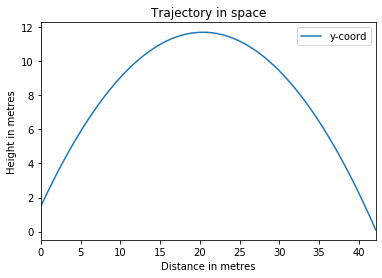

In [288]:
p1.plot()

In [14]:
p2=Projectile(ang=33,vel=20,h=1.5,info="Second Projectile")

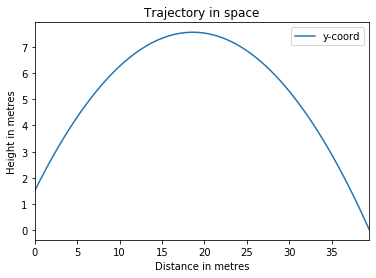

In [290]:
p2.plot()

In [291]:
p2.simulate()

,time,x-coord,y-coord
0.00,0.00,0.000000,1.500000
0.01,0.01,0.167734,1.608437
0.02,0.02,0.335468,1.715894
0.03,0.03,0.503202,1.822370
0.04,0.04,0.670936,1.927866
...,...,...,...
2.31,2.31,38.746580,0.497691
2.32,2.32,38.914314,0.379595
2.33,2.33,39.082048,0.260518
2.34,2.34,39.249783,0.140460


In [292]:
type(p2.simulate()['y-coord'])

pandas.core.series.Series

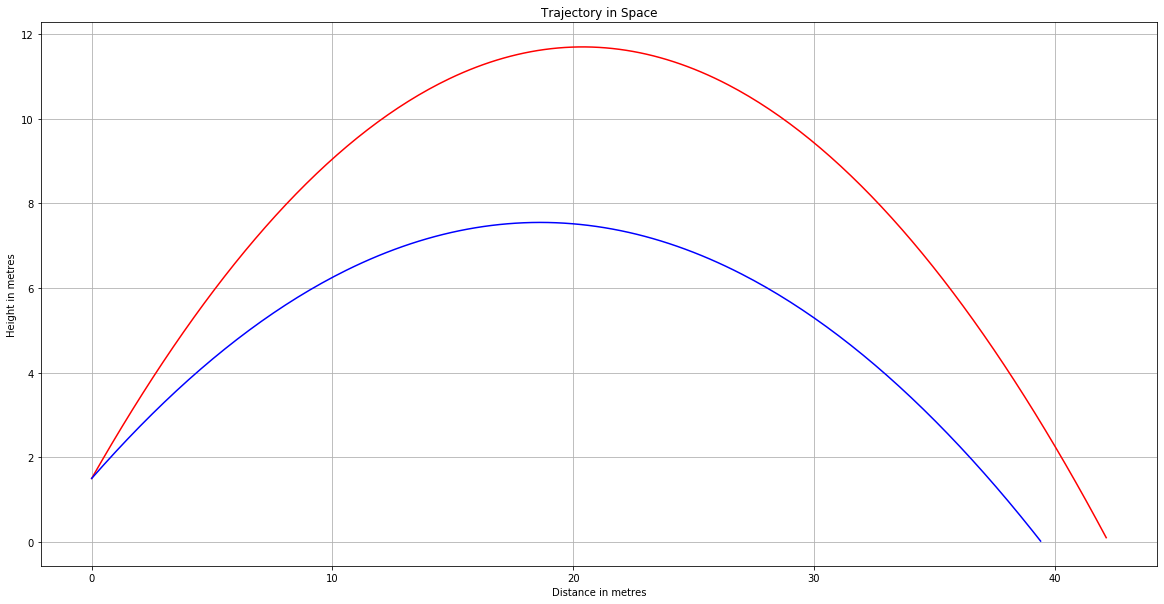

In [293]:
plt.figure(figsize = [20,10])

plt.plot(p1.simulate()['x-coord'],p1.simulate()['y-coord'],color='red')
plt.plot(p2.simulate()['x-coord'],p2.simulate()['y-coord'],color='blue')
plt.xlabel("Distance in metres")
plt.ylabel("Height in metres")
plt.title("Trajectory in Space")
plt.grid(True)
plt.show()

In [294]:
p1.flightdata()

For the First Projectile : angle= 0.7853981633974483 ,height of projection= 1.5 ,velocity= 20
The theoretical maximum height attained in flight :  11.697162129779285
The calculated maximum height attained in flight : 11.697140578172569
The theoretical time of flight was 2.9866214004938154
The calculated time of landing is 2.98    2.98
Name: time, dtype: float64
The theoretical range was 42.23720490252081
The calculated range is 2.98    42.143564
Name: time, dtype: float64


In [295]:
p2.flightdata()

For the Second Projectile : angle= 0.5759586531581288 ,height of projection= 1.5 ,velocity= 20
The theoretical maximum height attained in flight :  7.549602636213179
The calculated maximum height attained in flight : 7.549599844833602
The theoretical time of flight was 2.3515971422839055
The calculated time of landing is 2.35    2.35
Name: time, dtype: float64
The theoretical range was 39.44430621796159
The calculated range is 2.35    39.417517
Name: time, dtype: float64


In [15]:
p3=Projectile(ang=37,vel=20,h=1.5,info='Third projectile')

In [302]:
p3.flightdata()

For the Third projectile : angle= 0.6457718232379019 ,height of projection= 1.5 ,velocity= 20
The theoretical maximum height attained in flight :  8.886443323489683
The calculated maximum height attained in flight : 8.886409177040388
The theoretical time of flight was 2.5735891612432047
The calculated time of landing is 2.57    2.57
Name: time, dtype: float64
The theoretical range was 41.10719384883303
The calculated range is 2.57    41.049865
Name: time, dtype: float64


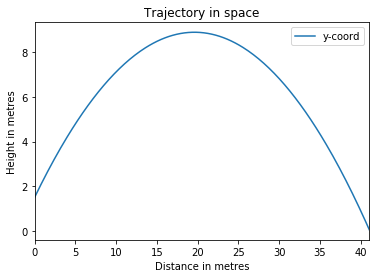

In [303]:
p3.plot()

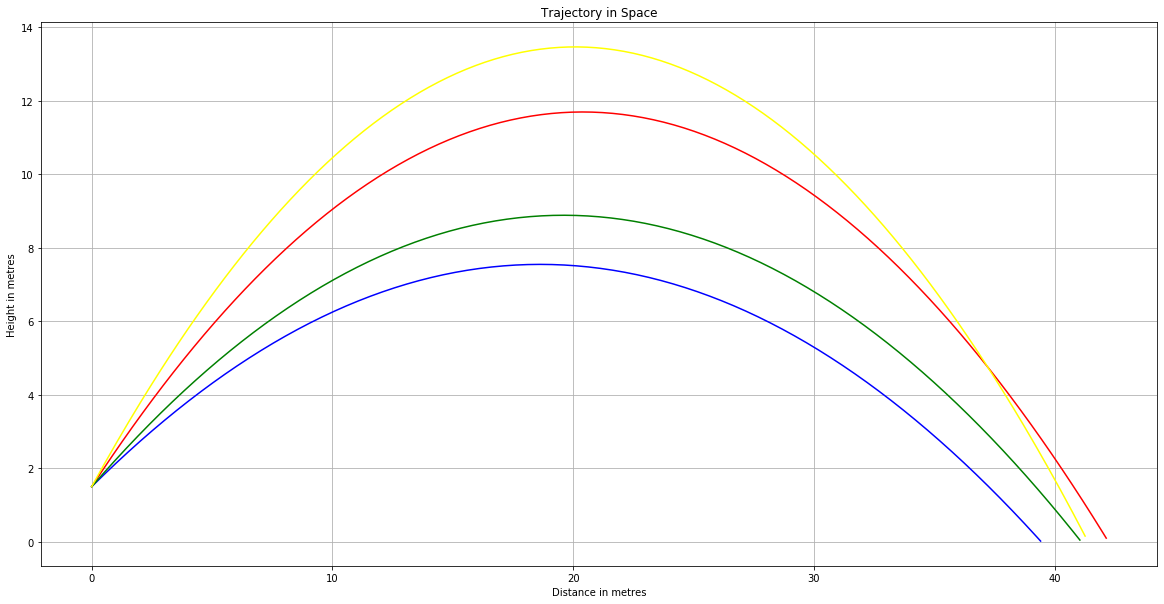

In [17]:
plt.figure(figsize = [20,10])

plt.plot(p1.simulate()['x-coord'],p1.simulate()['y-coord'],color='red')
plt.plot(p2.simulate()['x-coord'],p2.simulate()['y-coord'],color='blue')
plt.plot(p3.simulate()['x-coord'],p3.simulate()['y-coord'],color='green')
plt.plot(p4.simulate()['x-coord'],p4.simulate()['y-coord'],color='yellow')
plt.xlabel("Distance in metres")
plt.ylabel("Height in metres")
plt.title("Trajectory in Space")
plt.grid(True)
plt.show()

In [16]:
p4=Projectile(ang=50,vel=20,h=1.5,info="Fourth Projectile")

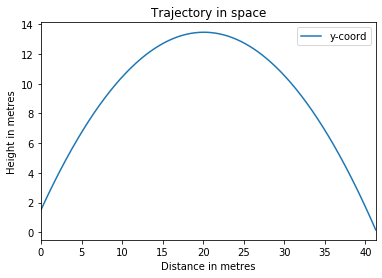

In [8]:
p4.plot()

In [9]:
p4.flightdata()

For the Fourth Projectile : angle= 0.8726646259971648 ,height of projection= 1.5 ,velocity= 20
The theoretical maximum height attained in flight :  13.46788075098969
The calculated maximum height attained in flight : 13.467854905312116
The theoretical time of flight was 3.2196079391398573
The calculated time of landing is 3.21    3.21
Name: time, dtype: float64
The theoretical range was 41.39048182655028
The calculated range is 3.21    41.266965
Name: time, dtype: float64
